# Project: Rivers

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
base_dir = os.getcwd()
file_path = os.path.join(base_dir, "Rivers.csv")

In [3]:
df = pd.read_csv(file_path)

## Data Analysis

In [4]:
df.info

<bound method DataFrame.info of         Id        River   Type  Discharge  Length     Width        Basin
0        1      Abdenai  River   191 m³/s  216 km  0.322 km      Abdenai
1        2    Nymphidam  River   547 m³/s  322 km  0.538 km    Nymphidam
2        3   Otigosthos  River  1407 m³/s  934 km  1.656 km   Otigosthos
3        4        Ecegi  River  1870 m³/s  743 km   1.57 km        Ecegi
4        5  Dotigosthos  River   280 m³/s  214 km  0.258 km     Chiossos
...    ...          ...    ...        ...     ...       ...          ...
1149  2083       Kopopo  Creek    92 m³/s   20 km  0.065 km       Kopopo
1150  2084  Naratispian  Creek    65 m³/s   24 km  0.043 km  Naratispian
1151  2085       Cornas  Creek    78 m³/s   23 km  0.065 km       Cornas
1152  2350   Trikasther  River    98 m³/s   30 km  0.193 km   Trikasther
1153  2351        Picea  River    85 m³/s   34 km  0.086 km        Picea

[1154 rows x 7 columns]>

In [5]:
unique_types = df["Type"].unique()
print(unique_types)

['River' 'Fork' 'Branch' 'Creek' 'Stream' 'Brook']


## Data Cleaning

Assigning IDs to string columns:

In [6]:
df["Type_ID"] = df["Type"].astype("category").cat.codes
type_ids = dict(enumerate(df["Type"].astype("category").cat.categories))
print(type_ids)

{0: 'Branch', 1: 'Brook', 2: 'Creek', 3: 'Fork', 4: 'River', 5: 'Stream'}


In [7]:
df["Basin_ID"] = df["Basin"].astype("category").cat.codes
basin_ids = dict(enumerate(df["Basin"].astype("category").cat.categories))
print(basin_ids)

{0: 'Abdekiondo', 1: 'Abdenai', 2: 'Abros', 3: 'Achargan', 4: 'Acharnas', 5: 'Aegea', 6: 'Aegira', 7: 'Aeiatea', 8: 'Aelamospon', 9: 'Aelopodina', 10: 'Aenai', 11: 'Aenatis', 12: 'Aerythralos', 13: 'Agrinasebai', 14: 'Agrita', 15: 'Aibethmodo', 16: 'Aicealairos', 17: 'Aicossa', 18: 'Akhamos', 19: 'Akramia', 20: 'Akramontion', 21: 'Akroicea', 22: 'Akroidea', 23: 'Akronion', 24: 'Akrorea', 25: 'Akrorintho', 26: 'Aktas', 27: 'Aktassos', 28: 'Aktos', 29: 'Amaidauroti', 30: 'Amphaga', 31: 'Amphagi', 32: 'Ampheiaros', 33: 'Amphidna', 34: 'Amphidria', 35: 'Amphinionti', 36: 'Amphiporint', 37: 'Amphita', 38: 'Amphos', 39: 'Amphyrale', 40: 'Amplios', 41: 'Ampsos', 42: 'Ampsostos', 43: 'Antiondonia', 44: 'Antos', 45: 'Aphalonia', 46: 'Aphidyrian', 47: 'Apia', 48: 'Apitros', 49: 'Apsos', 50: 'Argan', 51: 'Argiphylos', 52: 'Argipiakou', 53: 'Argos', 54: 'Argoscucia', 55: 'Argostossos', 56: 'Argylos', 57: 'Artyn', 58: 'Asemicos', 59: 'Askha', 60: 'Askroi', 61: 'Askrolis', 62: 'Asktos', 63: 'Asktosp

Cleaning mixed numerical-string values:

In [8]:
columns_to_clean = ["Discharge", "Length", "Width"]

for col in columns_to_clean:
    df[col] = df[col].str.replace(r"[^\d.]", "", regex=True).astype(float)

## SQL Integration

In [ ]:
import sqlite3

conn = sqlite3.connect("rivers.db")
df.to_sql("rivers", conn, if_exists="replace", index=False)

1154

In [19]:
query1 = """
SELECT Basin,
       SUM(Discharge) AS total_discharge
FROM rivers
GROUP BY Basin
ORDER BY total_discharge DESC
LIMIT 10;
"""

top_basins = pd.read_sql(query1, conn)
print(top_basins)

         Basin  total_discharge
0      Apitros          28343.0
1      Ririkon          15130.0
2      Diossos           8647.0
3     Histheri           6827.0
4     Orchosia           5415.0
5        Kores           5249.0
6        Abros           4975.0
7  Orchodessos           4714.0
8     Chiossos           4317.0
9       Cornas           3058.0


In [20]:
query2 = """
SELECT Type,
       AVG(Length) AS avg_length
FROM rivers
GROUP BY Type
ORDER BY avg_length DESC;
"""

avg_length = pd.read_sql(query2, conn)
print(avg_length)

     Type  avg_length
0   River  112.718362
1    Fork   90.019900
2  Stream   25.692308
3  Branch   25.444444
4   Brook   25.434783
5   Creek   25.290323


In [21]:
query3 = """
SELECT Type,
       COUNT(*) AS river_count
FROM rivers
GROUP BY Type
ORDER BY river_count DESC;
"""

river_counts = pd.read_sql(query3, conn)
print(river_counts)

     Type  river_count
0   River          806
1    Fork          201
2   Creek           93
3   Brook           23
4  Branch           18
5  Stream           13


In [32]:
query4 = """
SELECT River, Basin, Discharge
FROM rivers
ORDER BY Discharge DESC
LIMIT 20;
"""

largest_rivers = pd.read_sql(query4, conn)
print(largest_rivers)

          River        Basin  Discharge
0       Apitros      Apitros    11578.0
1       Ririkon      Ririkon     6131.0
2       Diossos      Diossos     4604.0
3      Histheri     Histheri     3333.0
4      Orchosia     Orchosia     2799.0
5         Kores        Kores     2661.0
6      Chiossos     Chiossos     2185.0
7   Orchodessos  Orchodessos     2154.0
8         Abros        Abros     2145.0
9         Ecegi        Ecegi     1870.0
10   Kopocearas      Apitros     1798.0
11    Tranelepi      Ririkon     1779.0
12       Amphos       Amphos     1677.0
13       Cornas       Cornas     1610.0
14         Apia         Apia     1534.0
15     Amphidna     Amphidna     1505.0
16     Podessos     Podessos     1444.0
17        Pydna      Apitros     1420.0
18   Otigosthos   Otigosthos     1407.0
19       Gorgan       Gorgan     1385.0


## Feature Engineering

Assigning categories to different discharge sizes.

In [23]:
bins = [0, 50, 100, 500, 1000, 5000, np.inf]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large", "Huge"]
width_factors = {
    "Very Small": 0.45,
    "Small": 0.50,
    "Medium": 0.55,
    "Large": 0.60,
    "Very Large": 0.65,
    "Huge": 0.70
}
df["Discharge_Class"] = pd.cut(df["Discharge"], bins=bins, labels=labels, right=False)

In [24]:
print(df[["River", "Discharge", "Discharge_Class"]].head(10))
print(df["Discharge_Class"].value_counts())

         River  Discharge Discharge_Class
0      Abdenai      191.0          Medium
1    Nymphidam      547.0           Large
2   Otigosthos     1407.0      Very Large
3        Ecegi     1870.0      Very Large
4  Dotigosthos      280.0          Medium
5       Margan       80.0           Small
6        Todes      177.0          Medium
7       Methos      244.0          Medium
8  Antiochialy      133.0          Medium
9       Paphos       90.0           Small
Discharge_Class
Small         522
Medium        390
Very Small    164
Large          45
Very Large     31
Huge            2
Name: count, dtype: int64


In [25]:
df["Avg_Width"] = df["Discharge_Class"].astype(str).map(width_factors) * df["Width"]

In [26]:
df["Approx_Area"] = df["Length"] * df["Avg_Width"]

In [27]:
df

,Id,River,Type,Discharge,Length,Width,Basin,Type_ID,Basin_ID,Discharge_Class,Avg_Width,Approx_Area
0,1,Abdenai,River,191.0,216.0,0.322,Abdenai,4,1,Medium,0.1771,38.2536
1,2,Nymphidam,River,547.0,322.0,0.538,Nymphidam,4,335,Large,0.3228,103.9416
2,3,Otigosthos,River,1407.0,934.0,1.656,Otigosthos,4,357,Very Large,1.0764,1005.3576
3,4,Ecegi,River,1870.0,743.0,1.570,Ecegi,4,122,Very Large,1.0205,758.2315
4,5,Dotigosthos,River,280.0,214.0,0.258,Chiossos,4,94,Medium,0.1419,30.3666
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2083,Kopopo,Creek,92.0,20.0,0.065,Kopopo,2,230,Small,0.0325,0.6500
1150,2084,Naratispian,Creek,65.0,24.0,0.043,Naratispian,2,319,Small,0.0215,0.5160
1151,2085,Cornas,Creek,78.0,23.0,0.065,Cornas,2,98,Small,0.0325,0.7475
1152,2350,Trikasther,River,98.0,30.0,0.193,Trikasther,4,503,Small,0.0965,2.8950


## Plotting

In [28]:
type_summary = df.groupby("Type").agg({
    "Discharge": "sum",
    "Length": "sum"
}).reset_index()

print(type_summary)

     Type  Discharge   Length
0  Branch      909.0    458.0
1   Brook     1550.0    585.0
2   Creek     6518.0   2352.0
3    Fork    25064.0  18094.0
4   River   183533.0  90851.0
5  Stream      874.0    334.0


In [29]:
import plotly.express as px

for rtype in df["Type"].unique():
    subset = df[df["Type"] == rtype]
    
    fig = px.scatter(
        subset,
        x='Length',
        y='Discharge',
        color='Discharge_Class',      
        hover_data=['River', 'Basin'], 
        title=f'Discharge vs Length for {rtype}',
        labels={'Length':'Length (km)', 'Discharge':'Discharge (m³/s)'}
    )
    
    fig.update_traces(mode='markers')
    
    fig.show()



0:	learn: 507.7002752	total: 21.8ms	remaining: 21.8s
100:	learn: 167.5531321	total: 2.39s	remaining: 21.3s
200:	learn: 109.2692888	total: 4.87s	remaining: 19.4s
300:	learn: 85.2092773	total: 7.51s	remaining: 17.4s
400:	learn: 71.2696744	total: 10.1s	remaining: 15.1s
500:	learn: 60.1511918	total: 12.7s	remaining: 12.6s
600:	learn: 53.9280038	total: 15.6s	remaining: 10.3s
700:	learn: 49.3421647	total: 18.2s	remaining: 7.77s
800:	learn: 45.7628325	total: 20.9s	remaining: 5.19s
900:	learn: 42.6831075	total: 23.7s	remaining: 2.6s
999:	learn: 40.7159593	total: 26.6s	remaining: 0us
Mean Squared Error: 86539.95


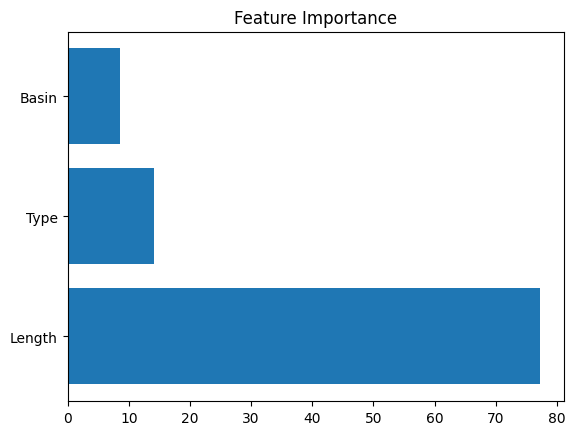

In [30]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ["Length", "Type", "Basin"]
target = "Discharge"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

cat_features = ["Type", "Basin"]

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    verbose=100
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

import matplotlib.pyplot as plt
plt.barh(features, model.get_feature_importance())
plt.title("Feature Importance")
plt.show()
